## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

In [1]:
#это что русский буквы тут мееем
Handle_answer = 6 - 16/3 
print(Handle_answer)

0.666666666666667


2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [116]:
### Очень удобно, импортировать не смогу, т.к. будет конфликт, да и проверяющего он не запустится, поэтому..
print('Потребовалось n=524288')

Потребовалось n=524288


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [3]:
from scipy.special import roots_legendre

def func(x):
        return 7*x**3 - 8*x**2- 3*x + 3
for i in range(1,7):
    x, w = roots_legendre(i)
    r = func(x) @ w
    ac = abs(1 - r / Handle_answer)
    print(f'n = {i}, Resalt = {r}, accurate={ac}')

n = 1, Resalt = 6.0, accurate=7.9999999999999964
n = 2, Resalt = 0.6666666666666674, accurate=6.661338147750939e-16
n = 3, Resalt = 0.6666666666666639, accurate=4.6629367034256575e-15
n = 4, Resalt = 0.6666666666666667, accurate=3.3306690738754696e-16
n = 5, Resalt = 0.6666666666666685, accurate=2.220446049250313e-15
n = 6, Resalt = 0.6666666666666694, accurate=3.552713678800501e-15


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

In [4]:
### Математика удивительная вещь - работает, более того не менясь с течением времени. Что тут вообще надо писать?
## как интересно, использование квадратуры лучше чем равномерное интегрирование уникалити..

###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

$$
\int_a^b f(x) dx  = \left[t = \frac{2}{b-a}x - \frac{b+a}{b-a}\right] =\int_{-1}^1 f\left(\frac{b+a}{2}+\frac{b-a}{2}t\right)\frac{b-a}{2}dt
$$

In [5]:
### Что? преобразование МЕНЯЕТ область интегрирования..какой системе координат лол.
def integrate_by_ab(func, a, b, n=4):
    t, w = roots_legendre(n)
    alpha = (b-a)/2
    beta = (b+a)/2
    r = func(beta + alpha * t) @ w * alpha
    return r

Сравните результат с точным значением интеграла.

In [6]:
from scipy.integrate import quad
a = 0
b = 10
my_res = integrate_by_ab(func, a, b)
sc_res = quad(func, a, b)
print(f'Quad gives:{sc_res}\n     My res:{my_res}')

Quad gives:(14713.333333333336, 1.6336216726388104e-10)
     My res:14713.333333333336


### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

$$x = 2\pi t \implies I = \frac{1}{2}\int_{-1}^{1}\frac{\cos(2\pi t)}{\sqrt{1-t^2}}dt$$

Мы знаем, что наша схема точно интегрирует многочлены $2n-1$ степени, т.ч. нам необходимо ответить на вопрос, многочлена какой степени нам достаточно для предстваления косинуса, чтобы накопить ошибку порядка $10^{-15}$
    Воспользуемся остаточным членом в форме лагранжа например для ряда тейлора(никто не утвердает, что тейлор - лучшеее приближение в нашей задаче, исключительно для оценки):
$$
\cos(2\pi t) = P_k(t) + \frac{(\cos(2\pi t))^{(k+1)}}{(k+1)!}\bigg|{t = \xi \in (-1,1)}    \implies err \sim \frac{(2\pi)^{k+1}}{(k+1)!} \xi^k\implies \left(\frac{2\pi e}{k+1}\right)^{k+1}\frac{1}{\sqrt{2\pi(k+1)}}\approx 10^{-15}\implies
$$
$$
\implies k\sim 36 \text{ (look below)} \implies
\boxed{n\approx 17} 
$$

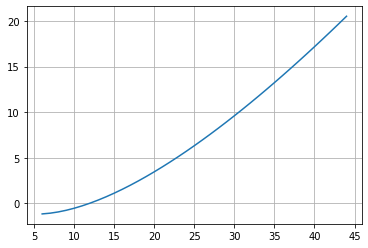

In [7]:
import matplotlib.pyplot as plt
import numpy as np
k = np.arange(6, 45)
plt.figure()
plt.plot(k, k*np.log10(k/(2*np.pi*np.e)) + np.log10(2*np.pi*k))
plt.grid()

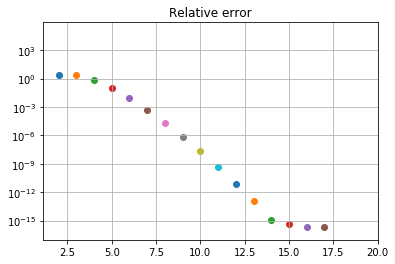

In [8]:
from scipy.special import roots_chebyt
from numpy import cos, sqrt, pi,e
#Getting exact res
t, w = roots_chebyt(26)
control_res = 1/2 * w @ cos(2*pi*t)
plt.figure()
plt.title('Relative error')
plt.yscale('log')
for n in range(2, 20):
    t, w = roots_chebyt(n)
    res = 1/2 * w @ cos(2*pi*t)
    plt.scatter(n, abs(1-res/control_res))
plt.grid()

Очень хорошо, промазал <<вверх>> на два порядка(на самом деле цель была получить оценку сверху, так что все ок)

## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda - \color{red}{\text{рациональное}}$ число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

# Task has been modificated.
Будем искать решение следующего уравнения:
$$
y(x) = \frac{\pi^2}{4} \int_0^1 K(x,s)y(s) ds + \frac{x}{2},\; K(x,s) = 
\begin{cases}
(2-s)x/2,\; x\le s\\
(2-x)s/2,\; s\le x
\end{cases}
$$ 
Прямой подстановкой легко убедиться, что решение
$$
y(x) = \sin(\pi x/2)
$$

In [137]:
from scipy.special import roots_sh_legendre
from numpy.linalg import solve

def get_matrix(s, w, l):
    n = s.shape[0]
    M = np.identity(n)
    
    for i in range(n):
        for j in range(n):
            k = get_k(s[i], s[j])
            M[i,j]-= l * w[j] * k
    return M

In [139]:
def get_k(x, s):
    k = x * (2-s) / 2 if x<=s else s *(2-x) / 2
    return k


def right_side(x):
    return x/2


def true_sol(x):
    return np.sin(pi*x/2)

l = pi**2/4

<IPython.core.display.Javascript object>


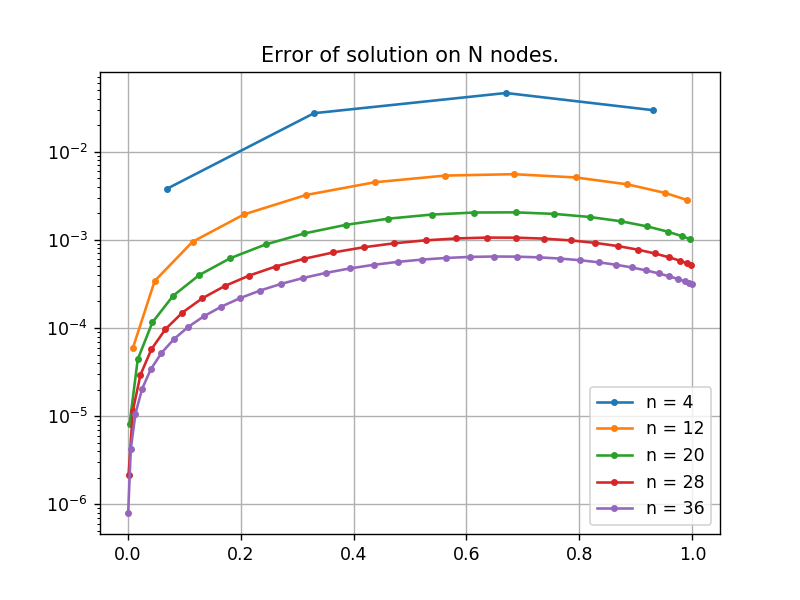

In [140]:
%matplotlib notebook
plt.figure()
plt.grid()
plt.title('Error of solution on N nodes.')

for n in np.arange(4, 40, 8):
    s, w = roots_sh_legendre(n)
    
    M = get_matrix(s, w, l=l)
    
    f = right_side(s)
    
    sol = solve(M, f)
    #plt.plot(s , true_sol(s))
    plt.plot(s, sol-true_sol(s),'.-',label=f'n = {n}')
plt.legend()
plt.yscale('log')

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

In [141]:
from scipy.interpolate import interp1d
n = 25
s, w = roots_sh_legendre(n)
M = get_matrix(s, w, l=l)
f = right_side(s)
sol = solve(M, f)

In [148]:
y = interp1d(s, sol) #from scipy

def revert_sol(x, s, l):
    r=0
    for j in range(n):
         r+= w[j] * get_k(x, s[j]) * sol[j]
    return right_side(x) + l * r

x = np.linspace(s[0], s[n-1], 60)
y_int = y(x)
y_revert = [revert_sol(x_i, s, l) for x_i in x]
y_true = true_sol(x)

<IPython.core.display.Javascript object>


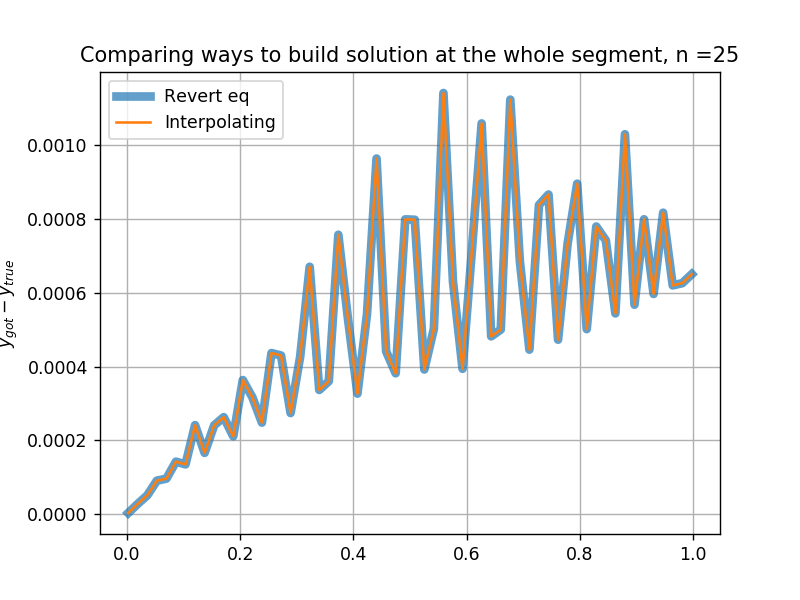

Text(0, 0.5, '$y_{got} - y_{true}$')

In [150]:
plt.figure()
plt.grid()
plt.title(f'Comparing ways to build solution at the whole segment, n ={n}')
plt.plot(x, y_revert - y_true,label='Revert eq', lw=5, alpha=0.7)
plt.plot(x, y_int - y_true, label='Interpolating')
#plt.plot(x, y_revert - y_true, label='Revert')
plt.legend()
plt.ylabel(r'$y_{got} - y_{true}$')

## Second try

<IPython.core.display.Javascript object>


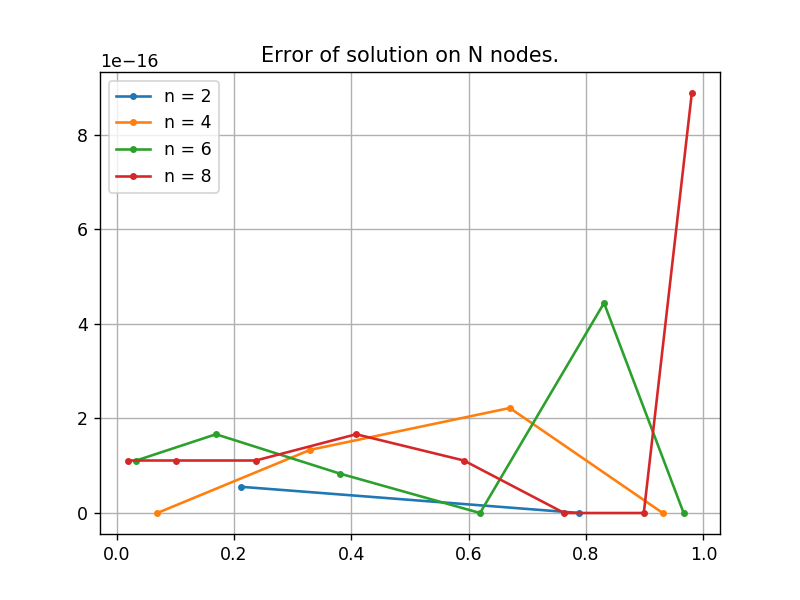

In [158]:
#Может это специфика уравнения?..Возьмем другое..
l=-2

def get_k(x, s):
    k = np.exp(x-s)
    return k


def right_side(x):
    return 2*x*np.exp(x)


def true_sol(x):
    return 2*np.exp(x)*(x-1/3)

plt.figure()
plt.title('Error of solution on N nodes.')
plt.grid()

for n in np.arange(2, 10, 2):
    s, w = roots_sh_legendre(n)
    
    M = get_matrix(s, w, l=l)
    
    f = right_side(s)
    sol = solve(M, f)
    
    #lt.plot(s , sol)
    
    plt.plot(s, abs(sol-true_sol(s)),'.-',label=f'n = {n}')
#plt.plot(s, true_sol(s),label='true')
plt.legend()

In [159]:
n = 4
s, w = roots_sh_legendre(n)
M = get_matrix(s, w, l=l)
f = right_side(s)
sol = solve(M, f)

y = interp1d(s, sol)

x = np.linspace(s[0], s[n-1], 80)
y_int = y(x)
y_revert = [revert_sol(x_i, s, l) for x_i in x]
y_true = true_sol(x)

<IPython.core.display.Javascript object>


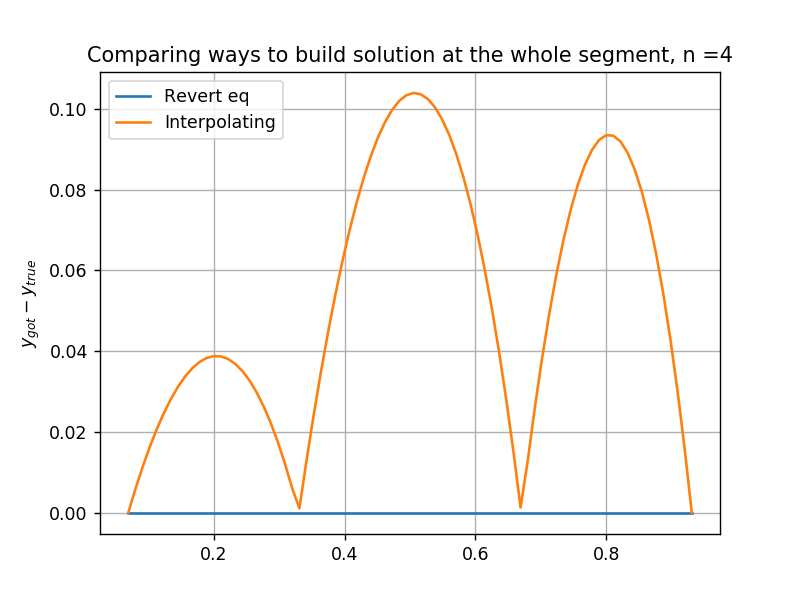

Text(0, 0.5, '$y_{got} - y_{true}$')

In [160]:
plt.figure()
plt.grid()
plt.title(f'Comparing ways to build solution at the whole segment, n ={n}')
plt.plot(x, y_revert - y_true,label='Revert eq')
plt.plot(x, y_int - y_true, label='Interpolating')
#plt.plot(x, y_revert - y_true, label='Revert')
plt.legend()
plt.ylabel(r'$y_{got} - y_{true}$')

## Third try..

$$
y(x) = \int_0^1 \sqrt{xs} y(s) ds + 5x
$$
Solution:
$$
y(x) = 5x +4\sqrt{x}
$$

<IPython.core.display.Javascript object>


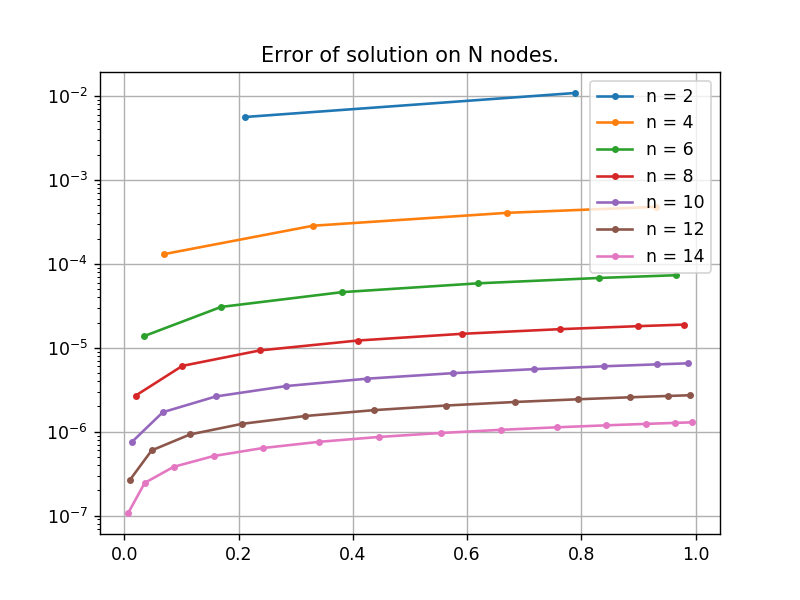

In [154]:
#Какая красота.. нашли мы наконец уравнение, на котором видно <<всё, что нужно>>

l=1

def get_k(x, s):
    k = sqrt(x*s)
    return k

def get_matrix(s, w, l):
    n = s.shape[0]
    M = np.identity(n)
    for i in range(n):
        for j in range(n):
            k = get_k(s[i], s[j])
            M[i,j]-= l * w[j] * k
    return M

def right_side(x):
    return 5*x


def true_sol(x):
    return 5*x + 4*sqrt(x)

plt.figure()
plt.title('Error of solution on N nodes.')
plt.grid()

for n in np.arange(2, 15, 2):
    s, w = roots_sh_legendre(n)
    
    M = get_matrix(s, w, l=l)
    
    f = right_side(s)
    
    sol = solve(M, f)
    
    plt.plot(s, abs(sol-true_sol(s)),'.-',label=f'n = {n}')
plt.yscale('log')
#plt.plot(s , true_sol(s))
plt.legend()

In [155]:
n = 10
s, w = roots_sh_legendre(n)
M = get_matrix(s, w, l=l)
f = right_side(s)
sol = solve(M, f)

y = interp1d(s, sol)
x = np.linspace(s[0], s[n-1], 80)
y_int = y(x)
y_revert = [revert_sol(x_i, s, l) for x_i in x]
y_true = true_sol(x)

<IPython.core.display.Javascript object>


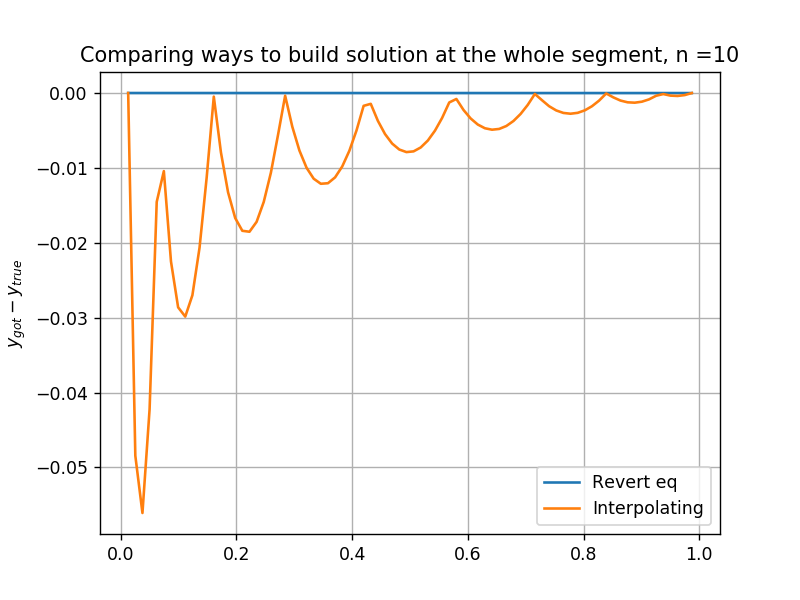

In [157]:
plt.figure()
plt.grid()
plt.title(f'Comparing ways to build solution at the whole segment, n ={n}')
plt.plot(x, y_revert - y_true,label='Revert eq')
plt.plot(x, y_int - y_true, label='Interpolating')
#plt.plot(x, y_revert - y_true, label='Revert')

plt.ylabel(r'$y_{got} - y_{true}$')
plt.legend()

# Conclusions
Мы разобрали три основных типа развития событий, при которых решение удается найти:
1. Очень медленная сходимость, при этом оказалось что интерполяция и обращение задачи выдают одинаковый ответ
2. Аналомально маленькая ошибка при любой степени квадратуры, обращение много лучше интерполяции.
P.S. Это связано, конечно с тем, что с точки зрения правильного решения интегрируем мы в итоге полином первой степени, поэтому квадратура так неожиданно хорошо выстреливает, эта ситуация более-менее общая для задач вычислительной физики - нужно заранее знать вид решения, чтобы выбрать, а иногда и придумать метод уточнения результата.
3. Хорошая скорость сходимости, с обращением та же ситуация..